# Vergleich BWS und Konkurrenz
###### 

Veröffentlichte Seminardaten der Anbieter BWS, ifb, WAF und Poko für das Jahr 2023 + SEO
> Stand der Daten: 21.10.2022, Markus Niggemeier
# 
### ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️
### *Auswertung beginnt ab 1.)*
### ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️
#### 
#### 

## 0.) Import von Libraries und Formatierung der Datensätze

In [6]:
from IPython import display
from datetime import datetime, timedelta
import locale
import warnings
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
warnings.filterwarnings('ignore')

In [7]:
# Setting up plot data
plt.style.use('seaborn')
locale.setlocale(locale.LC_ALL,'de_DE')
date_format = mpl_dates.DateFormatter("%B")
plz_shape_df = gpd.read_file("shape/plz-5stellig.shp", dtype={"plz": str})
zuordnung_plz_ort = pd.read_csv("zuordnung_plz_ort.csv", dtype={"plz": str})
germany_df = pd.merge(left=plz_shape_df, right=zuordnung_plz_ort, on="plz", how="inner")
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'München': (11.576124, 48.137154),
    'Kassel': (9.479700, 51.312700),
    'Erfurt': (11.029900, 50.984800),
    'Stuttgart': (9.181332, 48.777128),
    'Nürnberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)}

# Map plotting function
def brd_map(provider, df):
    fig, ax = plt.subplots()
    plz_shape_df.plot(ax=ax, color='lightgreen', alpha=0.8)
    df.plot(
        ax=ax, 
        column='count', 
        categorical=False, 
        legend=True, 
        cmap='autumn_r',
        alpha=0.8)

    for c in top_cities.keys():
        ax.text(
            x=top_cities[c][0], 
            y=top_cities[c][1] + 0.08, 
            s=c, 
            fontsize=10,
            ha='center')

        ax.plot(
            top_cities[c][0], 
            top_cities[c][1], 
            marker='o',
            c='black', 
            alpha=0.8)

    ax.set(
        title=provider, 
        aspect=1.5, 
        facecolor='lightblue')

# Read data from xlsx files
bws_data = pd.read_excel("bws_data_osm.xlsx")
ifb_data = pd.read_excel("ifb_data_osm.xlsx")
waf_data = pd.read_excel("waf_data_osm.xlsx")
poko_data = pd.read_excel("poko_data_osm.xlsx")

# Drop unnecessary columns
bws_data.drop(columns=["subtitle", "sem_no"], axis=1, inplace=True)
ifb_data.drop(columns=["sem_no", "online", "url"], axis=1, inplace=True)
waf_data.drop(columns=["subtitle", "sem_no", "url"], axis=1, inplace=True)
poko_data.drop(columns=["starter-kit", "online", "url"], axis=1, inplace=True)

# BR1 seminar names
bws_br1 = ["BR 1 – Das Einmaleins für neu gewählte Betriebsrät*innen",
           "BR 1 – Das Einmaleins für neu gewählte Betriebsrät*innen - Kompaktseminar",
           "BR 1 Crash - Das Einmaleins für neu gewählte Betriebsrät*innen",
           "BR 1 kompakt online – 4 Wochen intensiv"]
ifb_br1 = ["Betriebsrat Teil I"]
waf_br1 = ["Betriebsverfassungsrecht Teil 1"]
poko_br1 = ["Betriebsverfassungsrecht I"]

# Count of seminars
bws_sem_count = bws_data["title"].count()
ifb_sem_count = ifb_data["title"].count()
waf_sem_count = waf_data["title"].count()
poko_sem_count = poko_data["title"].count()
seminar_count = pd.DataFrame([["BWS", bws_sem_count], ["ifb", ifb_sem_count],
                              ["WAF", waf_sem_count], ["Poko", poko_sem_count]],
                             columns=["Anbieter", "Anzahl Seminare"])

# Factors (BWS = 1)
factor_bws = bws_sem_count / bws_sem_count
factor_ifb = ifb_sem_count / bws_sem_count
factor_waf = waf_sem_count / bws_sem_count
factor_poko = poko_sem_count / bws_sem_count

# Count of seminars on specific date
bws_date_counts = pd.read_excel("bws_date_counts.xlsx")
bws_date_counts.sort_values(by=["date"], ascending=True, inplace=True)
ifb_date_counts = pd.read_excel("ifb_date_counts.xlsx")
ifb_date_counts.sort_values(by=["date"], ascending=True, inplace=True)
waf_date_counts = pd.read_excel("waf_date_counts.xlsx")
waf_date_counts.sort_values(by=["date"], ascending=True, inplace=True)
poko_date_counts = pd.read_excel("poko_date_counts.xlsx")
poko_date_counts.sort_values(by=["date"], ascending=True, inplace=True)

# OSM counts
bws_osm_counts = pd.DataFrame(bws_data["osm_id"].value_counts()).reset_index()
bws_osm_counts.columns = ["osm_id", "count"]
ifb_osm_counts = pd.DataFrame(ifb_data["osm_id"].value_counts()).reset_index()
ifb_osm_counts.columns = ["osm_id", "count"]
waf_osm_counts = pd.DataFrame(waf_data["osm_id"].value_counts()).reset_index()
waf_osm_counts.columns = ["osm_id", "count"]
poko_osm_counts = pd.DataFrame(poko_data["osm_id"].value_counts()).reset_index()
poko_osm_counts.columns = ["osm_id", "count"]

# Postal code counts
bws_plz_counts = pd.merge(left=zuordnung_plz_ort, right=bws_osm_counts, on="osm_id", how="left")
bws_plz_counts = bws_plz_counts[bws_plz_counts["count"].notna()]
ifb_plz_counts = pd.merge(left=zuordnung_plz_ort, right=ifb_osm_counts, on="osm_id", how="left")
ifb_plz_counts = ifb_plz_counts[ifb_plz_counts["count"].notna()]
waf_plz_counts = pd.merge(left=zuordnung_plz_ort, right=waf_osm_counts, on="osm_id", how="left")
waf_plz_counts = waf_plz_counts[waf_plz_counts["count"].notna()]
poko_plz_counts = pd.merge(left=zuordnung_plz_ort, right=poko_osm_counts, on="osm_id", how="left")
poko_plz_counts = poko_plz_counts[poko_plz_counts["count"].notna()]

# Map postal code polygons
bws_map_plz_counts = pd.merge(left=germany_df, right=bws_plz_counts, on="plz", how="left")
bws_map_plz_counts = bws_map_plz_counts[["plz", "geometry", "count"]]
ifb_map_plz_counts = pd.merge(left=germany_df, right=ifb_plz_counts, on="plz", how="left")
ifb_map_plz_counts = ifb_map_plz_counts[["plz", "geometry", "count"]]
waf_map_plz_counts = pd.merge(left=germany_df, right=waf_plz_counts, on="plz", how="left")
waf_map_plz_counts = waf_map_plz_counts[["plz", "geometry", "count"]]
poko_map_plz_counts = pd.merge(left=germany_df, right=poko_plz_counts, on="plz", how="left")
poko_map_plz_counts = poko_map_plz_counts[["plz", "geometry", "count"]]

# SEO data
domain_traffic = pd.read_csv("seo/domain_traffic_jan_sep.csv", index_col=0)
domain_traffic.drop(columns=["Zieltyp", "Absprungrate"], axis=1, inplace=True)
keyword_gaps = pd.read_excel("seo/keyword_gaps.xlsx")
keyword_gaps = keyword_gaps[["Keyword", "igbce-bws.de", "ifb.de", "waf-seminar.de", "poko.de"]]
social_media_seo = pd.read_csv("seo/social_media_jan_sep.csv", index_col=0)

In [4]:
%matplotlib inline

### 
## 1.) Seminardaten 2023

### Anzahl Seminare

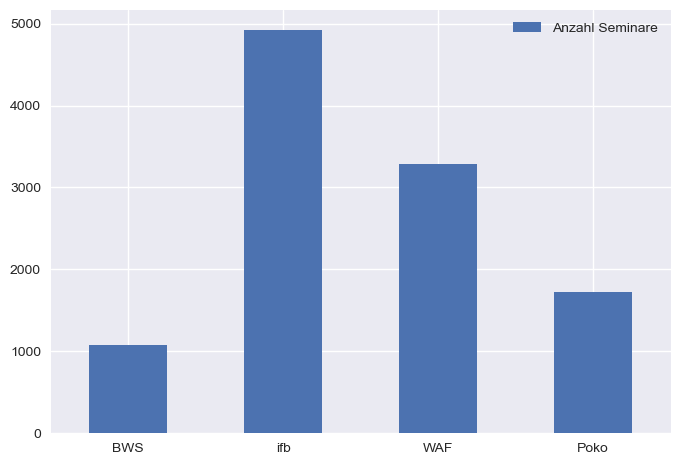

In [8]:
seminar_count.plot.bar(x='Anbieter', y='Anzahl Seminare', xlabel='', rot=0);

### Jahresverteilung der Seminare

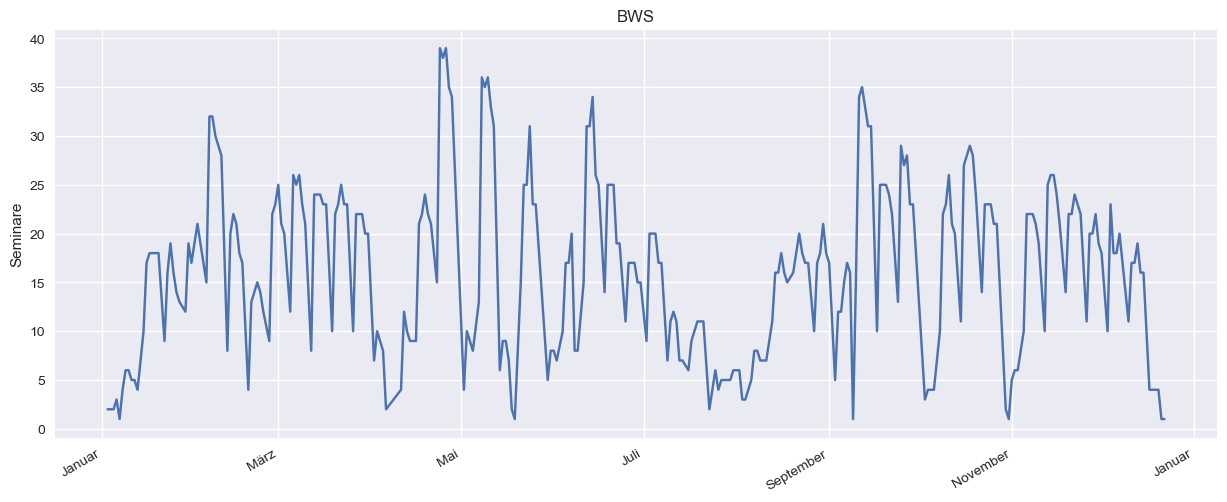

In [35]:
plt.rcParams["figure.figsize"] = [15,6]
plt.plot_date(bws_date_counts["date"], bws_date_counts["count"], linestyle="solid", marker=None)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set(ylabel="Seminare", title="BWS");

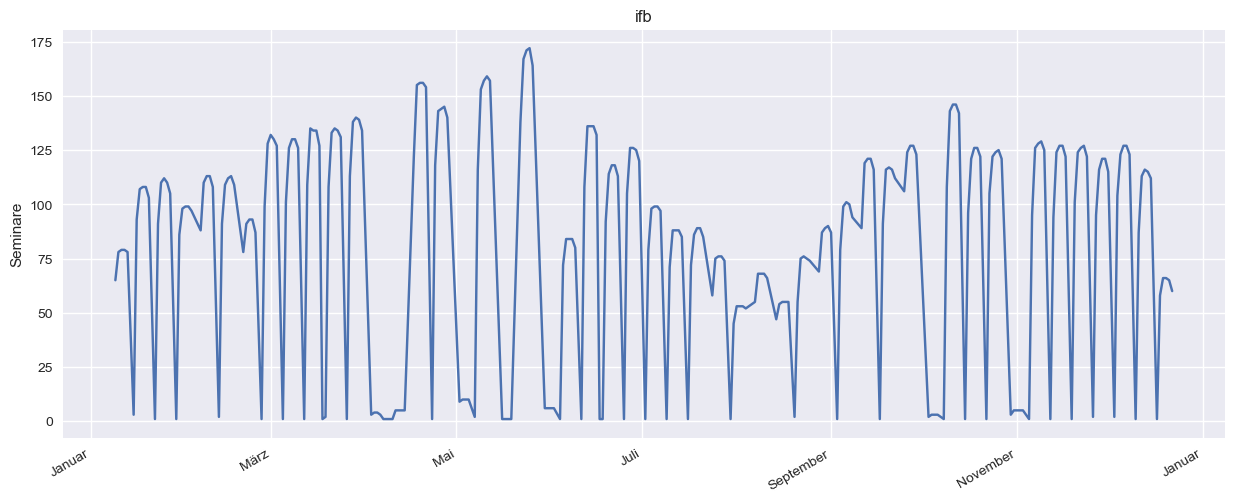

In [34]:
plt.plot_date(ifb_date_counts["date"], ifb_date_counts["count"], linestyle="solid", marker=None)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set(ylabel="Seminare", title="ifb");

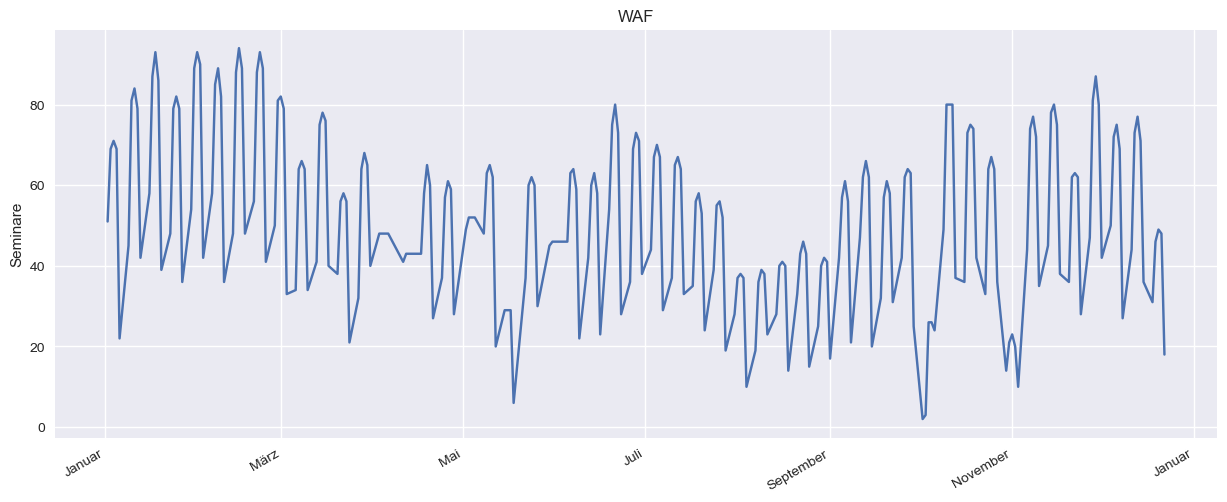

In [36]:
plt.plot_date(waf_date_counts["date"], waf_date_counts["count"], linestyle="solid", marker=None)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set(ylabel="Seminare", title="WAF");

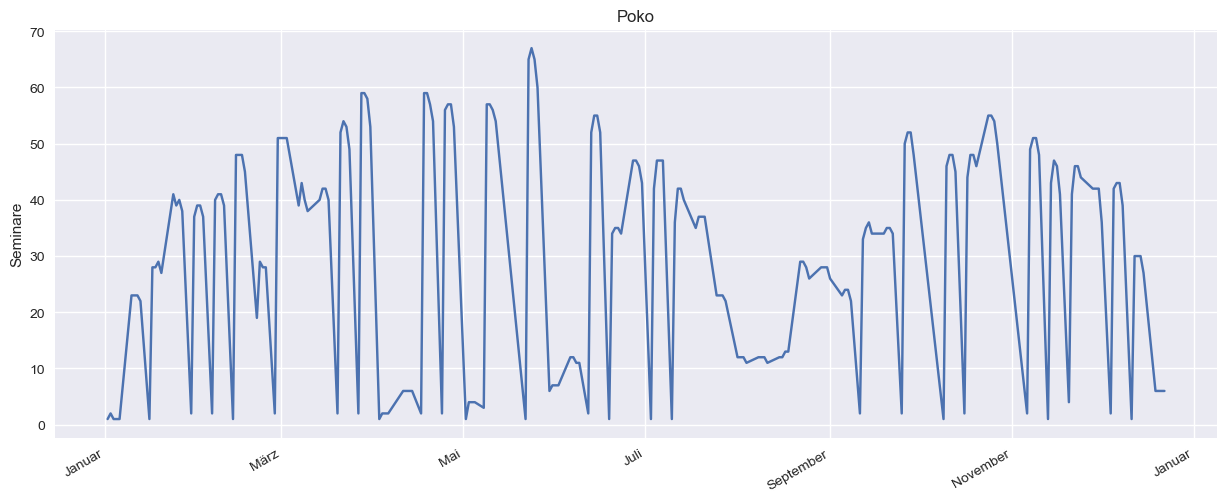

In [37]:
plt.plot_date(poko_date_counts["date"], poko_date_counts["count"], linestyle="solid", marker=None)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set(ylabel="Seminare", title="Poko");

### Geografische Seminardaten
#### In welcher Region finden Seminare statt?

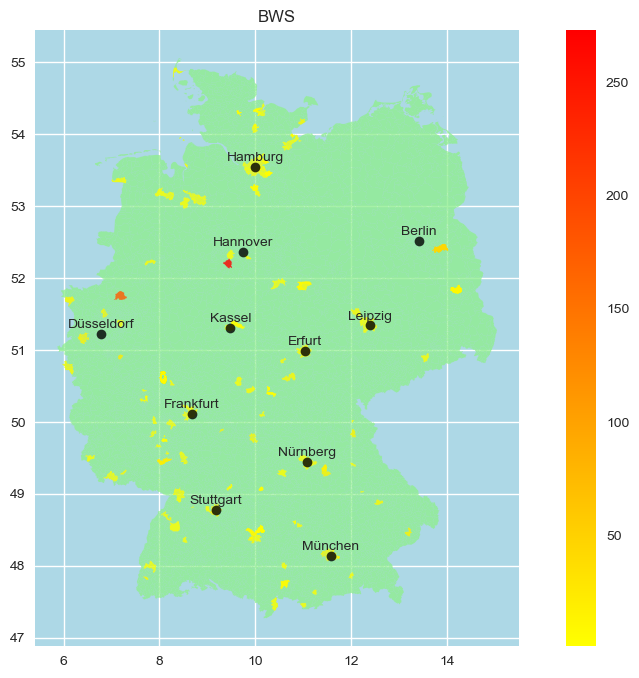

In [12]:
plt.rcParams["figure.figsize"] = [12,8]
brd_map("BWS", bws_map_plz_counts)

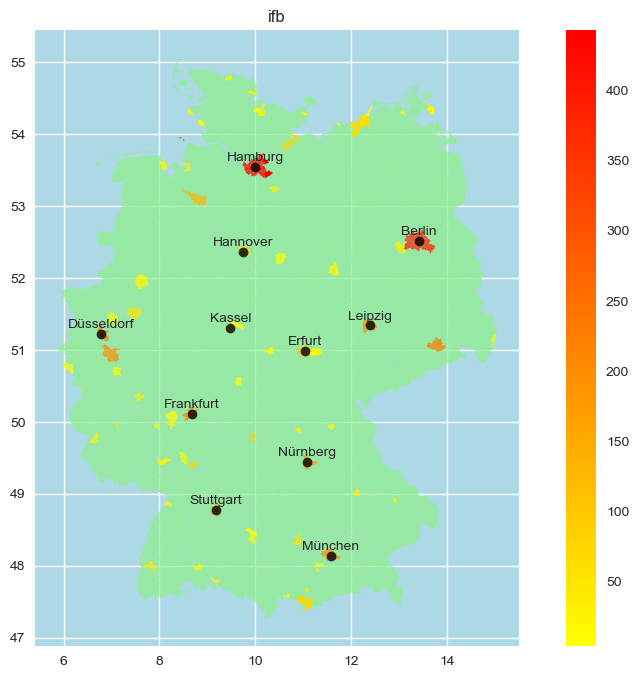

In [14]:
brd_map("ifb", ifb_map_plz_counts)

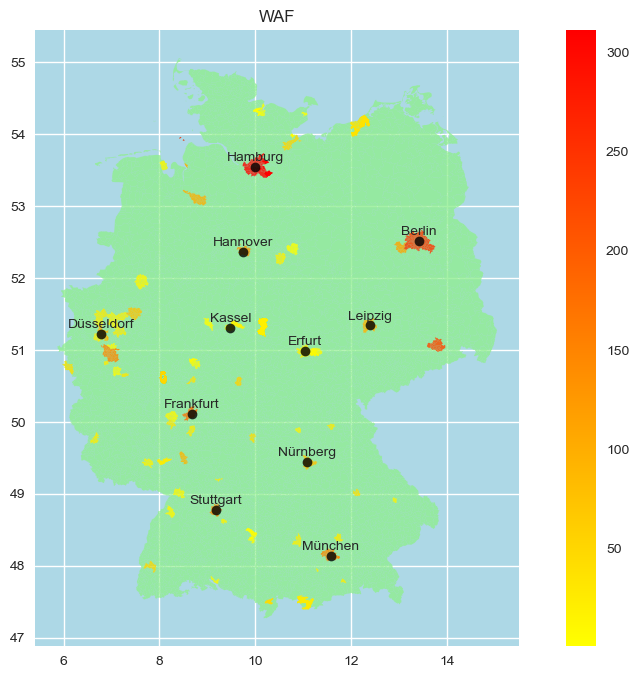

In [13]:
brd_map("WAF", waf_map_plz_counts)

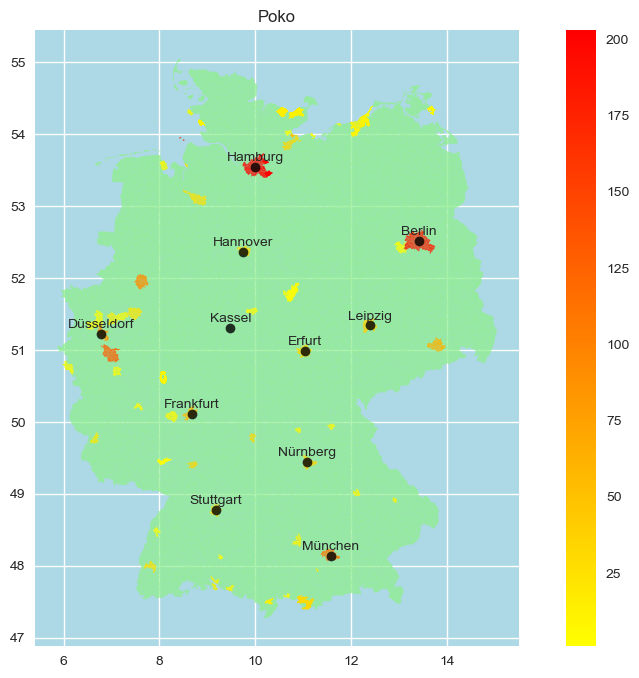

In [9]:
brd_map("Poko", poko_map_plz_counts)

### 
## 2.) SEO-Daten Jan-Sept. '22
#### 
### Überblick

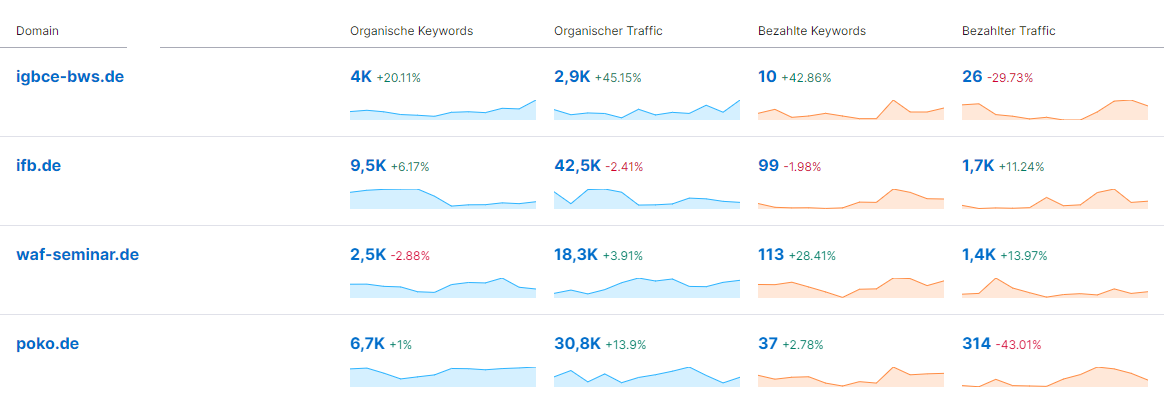

In [10]:
display.Image("seo/bws_competitors_overview_year.png")

#### 
### Traffic-Quellen
#### 

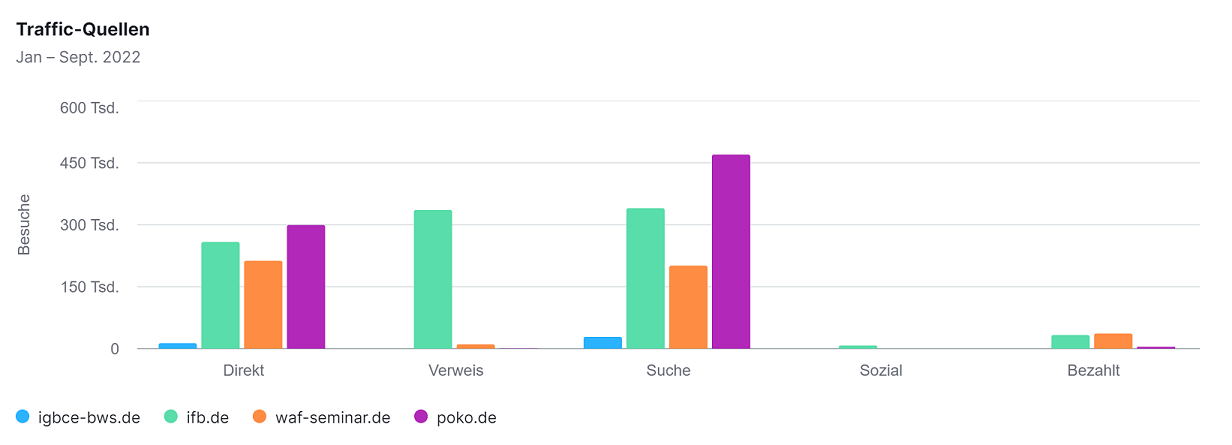

In [11]:
display.Image("seo/traffic_sources_jan_sep.png")

#### 
### Domain Traffic
#### 

In [12]:
domain_traffic

,Besuche,Einzelne Besucher,Seiten / Besuch,Durchschn. Besuchsdauer
Ziel,,,,
igbce-bws.de,42153,26523,3.66,03:15
ifb.de,982439,462261,3.84,09:36
waf-seminar.de,464615,228183,2.84,06:46
poko.de,780831,368078,1.71,10:27


#### 
#### Besucher

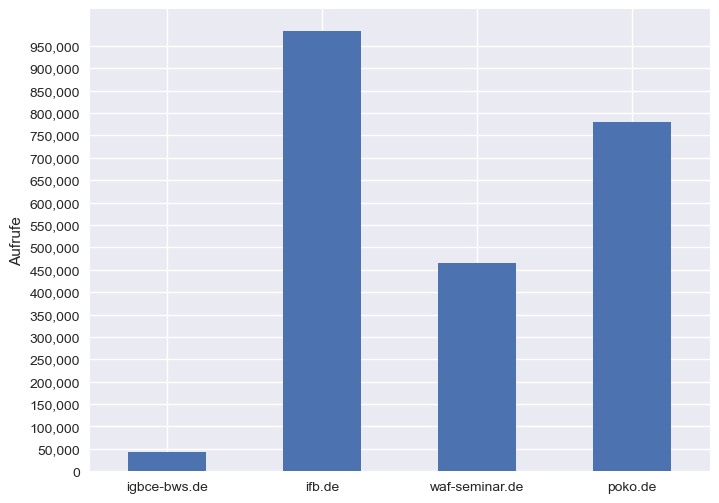

In [107]:
plt.rcParams["figure.figsize"] = [8,6]
visitors = domain_traffic["Besuche"].plot.bar(xlabel='', ylabel="Aufrufe", rot=0)
visitors.set_yticks(np.arange(0, 1000000, 50000))
visitors.set_yticklabels(['{:,.0f}'.format(x) for x in visitors.get_yticks()]);

#### 
#### Durchschnittliche Dauer des Besuchs

In [101]:
domain_traffic["Durchschn. Besuchsdauer"] = [(int(t[:2])*60 + int(t[3:]))/60 for t in domain_traffic["Durchschn. Besuchsdauer"]]

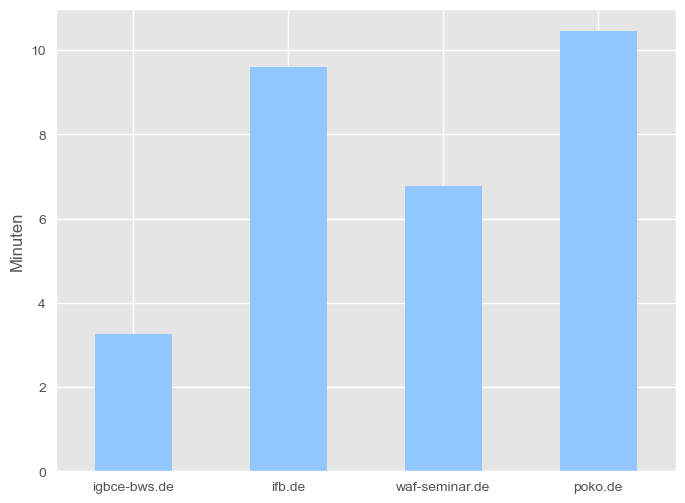

In [102]:
domain_traffic["Durchschn. Besuchsdauer"].plot.bar(xlabel='', ylabel="Minuten", rot=0);

#### 
### Social Media
#### Zielgruppen: Social Media Konsum

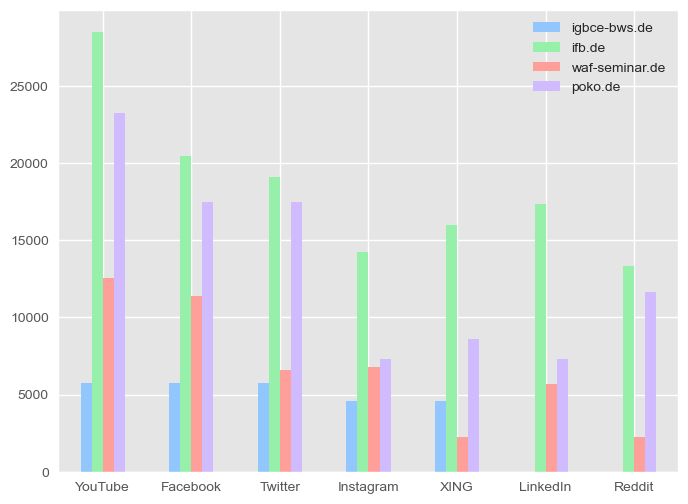

In [103]:
social_media_seo.plot.bar(rot=0);

#### 
### Keywords

#### Top Keywords BWS mit Vergleich Konkurrenz

In [77]:
keyword_gaps.sort_values(by=["igbce-bws.de"], ascending=False).head(10)

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
1,betriebsrat,98,32,4,36
42,aktuelle rechtsprechung,98,26,21,40
149,betriebsänderung betriebsrat,98,7,21,18
153,fortbildung sgb ix,97,8,30,40
294,aufgaben einer jav,95,3,75,16
322,betrvg 37 abs 6,94,23,26,14
267,seminarkosten bei krankheit,94,27,21,15
80,betriebsrat pflicht ab wann,93,45,7,52
38,betriebsänderung,93,5,25,27
137,antrag auf gleichstellung betriebsrat,92,8,85,21


#### Top Keywords ifb mit Vergleich Konkurrenz

In [19]:
keyword_gaps.sort_values(by=["ifb.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
285,abkürzung betriebsratsvorsitzender,92,93,24,9
210,br einsicht gehaltslisten,46,91,71,50
241,mitbestimmungspflichtige angelegenheiten betri...,69,84,22,54
96,konstituierende sitzung betriebsrat ablauf,43,80,92,8
228,jav wahl anfechten,65,77,53,1


#### Top Keywords WAF mit Vergleich Konkurrenz

In [20]:
keyword_gaps.sort_values(by=["waf-seminar.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
55,mobiles arbeiten betriebsvereinbarung,50,20,98,71
25,betriebsvereinbarung mobiles arbeiten,52,20,96,74
215,einladung wirtschaftsausschusssitzung,15,6,94,18
129,wahlordnung betrvg pdf,84,58,93,14
233,kündigung betriebsrat ersatzmitglied,79,1,93,36


#### Top Keywords WAF mit Vergleich Konkurrenz

In [21]:
keyword_gaps.sort_values(by=["poko.de"], ascending=False).head()

,Keyword,igbce-bws.de,ifb.de,waf-seminar.de,poko.de
82,betriebsratsbüro,21,12,17,94
254,schulung outlook 365,48,18,15,92
318,betriebsratsmitglied absetzen,30,15,18,88
252,schichtarbeit mitbestimmung betriebsrat,26,17,40,87
284,179 sgb ix kommentar,72,7,52,83
